In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\libin_urv2w13\\Desktop\\mljourney\\matplotlib-works\\customer-behaviour-case-study\\E-commerce Customer Behavior - Sheet1.csv")
print(df.shape)
print(df.columns)
print(df.head())
print(df.tail())

(350, 11)
Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='str')
   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0   

In [2]:
# print(df.isnull().sum())
# renaming all columns
df.rename(columns={"Customer ID":"customer_id","Gender":"gender","Age":"age","City":"city","Membership Type":"membership_type","Total Spend":"total_spend","Items Purchased":"items_purchased","Average Rating":"average_rating","Discount Applied":"discount_applied","Days Since Last Purchase":"days_since_last_purchase","Satisfaction Level":"satisfaction_level"},inplace=True)
df.columns

Index(['customer_id', 'gender', 'age', 'city', 'membership_type',
       'total_spend', 'items_purchased', 'average_rating', 'discount_applied',
       'days_since_last_purchase', 'satisfaction_level'],
      dtype='str')

In [3]:
# filling 'satisfaction_level' column using 'apply'. x represents each value of 'average_rating'
df["satisfaction_level"]=df["average_rating"].apply(lambda x:"unsatisfied" if x<=4.0 else "neutral" if x>4.0 and x<4.5 else "satisfied")
print(df.isnull().sum())

customer_id                 0
gender                      0
age                         0
city                        0
membership_type             0
total_spend                 0
items_purchased             0
average_rating              0
discount_applied            0
days_since_last_purchase    0
satisfaction_level          0
dtype: int64


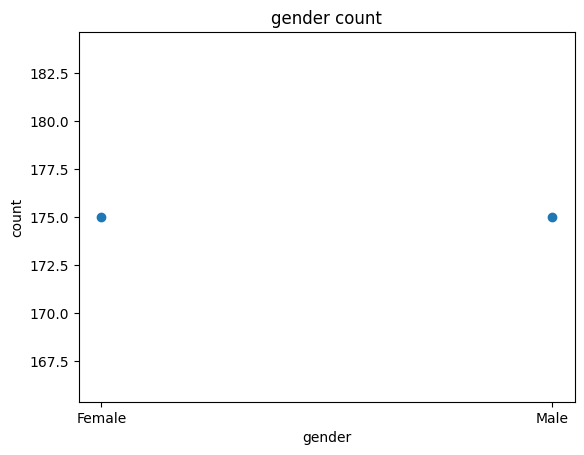

In [4]:
gender_count=df["gender"].value_counts()
plt.plot(gender_count,marker="o",linestyle="none")
plt.title("gender count")
plt.xlabel("gender")
plt.ylabel("count")
plt.show()

In [5]:
# average age of customers
df["age"].mean().astype(int)

np.int64(33)

In [6]:
# unique memberships
df["membership_type"].unique()

<StringArray>
['Gold', 'Silver', 'Bronze']
Length: 3, dtype: str

Text(0, 0.5, 'count')

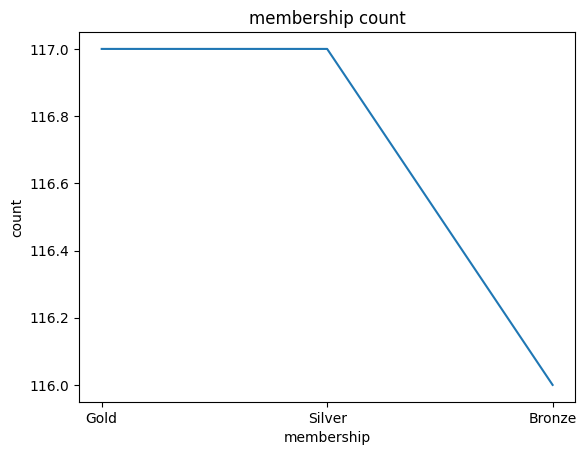

In [7]:
# membership wise count
membership_wise_count=df["membership_type"].value_counts()
plt.plot(membership_wise_count)
plt.title("membership count")
plt.xlabel("membership")
plt.ylabel("count")

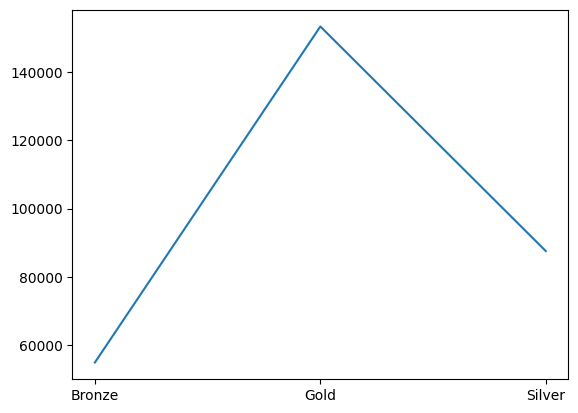

In [8]:
# membership wise total spend
plt.plot(df.groupby("membership_type")["total_spend"].sum())

Text(0, 0.5, 'amount')

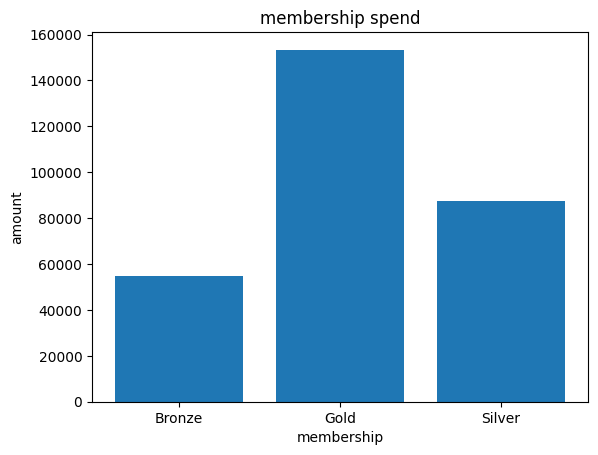

In [9]:
ms_spend= df.groupby("membership_type")["total_spend"].sum()
plt.bar(ms_spend.index,ms_spend.values)
plt.title("membership spend")
plt.xlabel("membership")
plt.ylabel("amount")

In [10]:
# gold member details
df[df["membership_type"]=="Gold"]

,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,satisfied
6,107,Female,31,New York,Gold,1150.6,15,4.5,True,28,satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,satisfied
12,113,Female,30,New York,Gold,1200.8,16,4.3,True,21,neutral
...,...,...,...,...,...,...,...,...,...,...,...
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,satisfied
341,442,Female,31,New York,Gold,1140.6,15,4.5,True,36,satisfied
344,445,Male,28,San Francisco,Gold,1480.1,21,4.9,False,13,satisfied


In [11]:
# rating above 4.5
df[df["average_rating"]>4.5]

,customer_id,gender,age,city,membership_type,total_spend,items_purchased,average_rating,discount_applied,days_since_last_purchase,satisfaction_level
0,101,Female,29,New York,Gold,1120.2,14,4.6,True,25,satisfied
3,104,Male,30,San Francisco,Gold,1480.3,19,4.7,False,12,satisfied
9,110,Male,28,San Francisco,Gold,1520.1,21,4.8,False,9,satisfied
15,116,Male,29,San Francisco,Gold,1360.2,18,4.9,False,11,satisfied
18,119,Female,32,New York,Gold,1170.3,14,4.7,True,29,satisfied
...,...,...,...,...,...,...,...,...,...,...,...
326,427,Male,30,San Francisco,Gold,1450.5,19,4.6,False,14,satisfied
332,433,Male,28,San Francisco,Gold,1490.1,21,4.9,False,11,satisfied
335,436,Female,30,New York,Gold,1200.8,16,4.7,True,28,satisfied
338,439,Male,30,San Francisco,Gold,1460.5,20,4.8,False,15,satisfied


Text(0, 0.5, 'customer count')

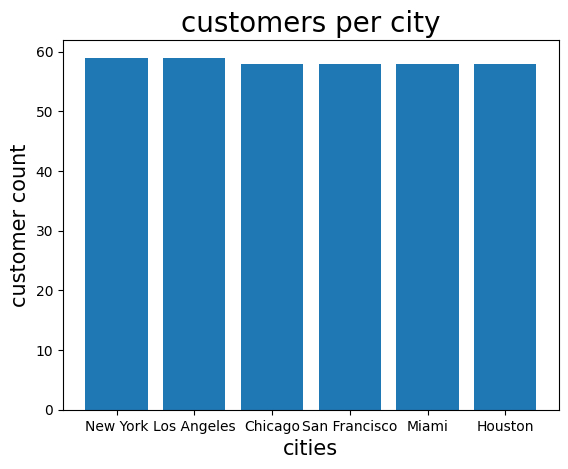

In [12]:
# customers per city (plot)
city_wise_customers=df["city"].value_counts()
plt.bar(city_wise_customers.index,city_wise_customers.values)
plt.title("customers per city",size=20)
plt.xlabel("cities",size=15)
plt.ylabel("customer count",size=15)

<BarContainer object of 6 artists>

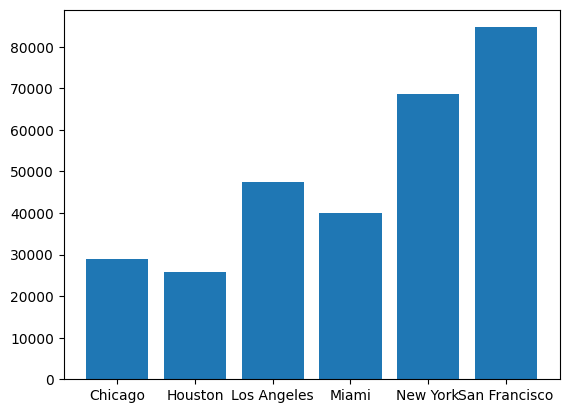

In [13]:
# city wise total spend (plot)
cw_total_spend=df.groupby("city")["total_spend"].sum()
plt.bar(cw_total_spend.index,cw_total_spend.values)

([<matplotlib.patches.Wedge at 0x1fbda3d3770>,
 [Text(1.0482892953801437, 0.3333009948851073, 'Chicago'),
  Text(0.6915931686830732, 0.8553939963729618, 'Houston'),
  Text(-0.10970201354560376, 1.094516088609044, 'Los Angeles'),
  Text(-0.9428293511093423, 0.5666328746964271, 'Miami'),
  Text(-0.8991876248554197, -0.633609986748054, 'New York'),
  Text(0.684663489670123, -0.860950582735577, 'San Francisco')],
 [Text(0.5717941611164419, 0.18180054266460394, '9.8%'),
  Text(0.3772326374634944, 0.4665785434761609, '8.8%'),
  Text(-0.05983746193396568, 0.5970087756049329, '16.1%'),
  Text(-0.5142705551505503, 0.309072477107142, '13.5%'),
  Text(-0.49046597719386525, -0.34560544731712034, '23.2%'),
  Text(0.3734528125473398, -0.4696094087648601, '28.6%')])

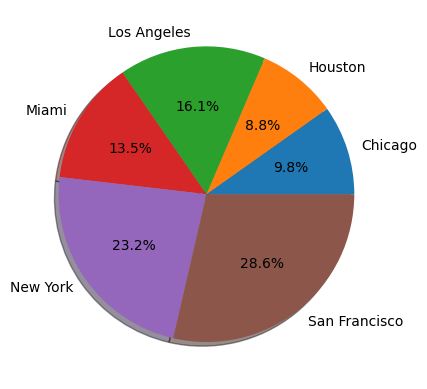

In [14]:
# city wise total spend (plot pie chart)
city_spend=df.groupby("city")["total_spend"].sum()
plt.pie(city_spend,labels=city_spend.index,autopct="%1.1f%%",shadow=True)

Text(0, 0.5, 'average rating')

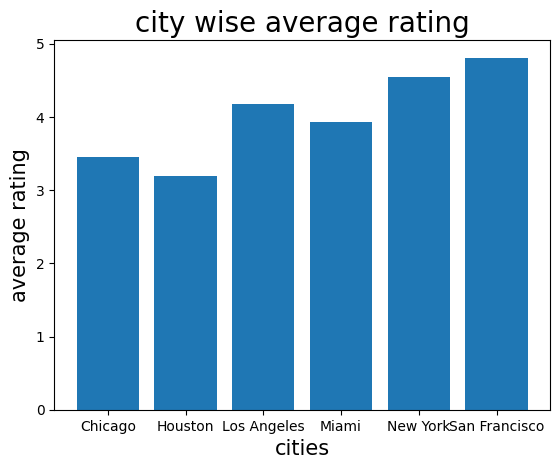

In [15]:
# city wise average rating
cw_avg_rating=df.groupby("city")["average_rating"].mean()
plt.bar(cw_avg_rating.index,cw_avg_rating.values)
plt.title("city wise average rating", size=20)
plt.xlabel("cities",size=15)
plt.ylabel("average rating",size=15)

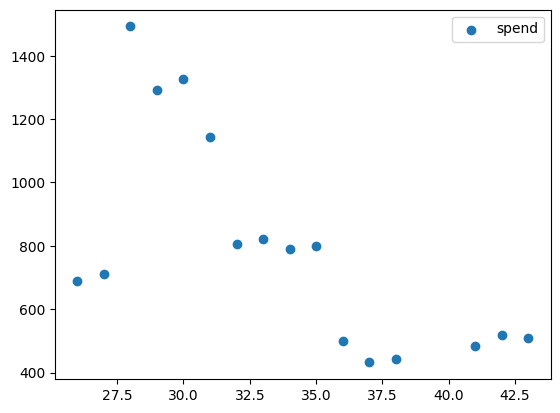

In [16]:
# age wise avg spend
age_wise_spend = df.groupby("age")["total_spend"].mean()
plt.scatter(age_wise_spend.index,age_wise_spend.values,label="spend") 
plt.legend()

(array([ 69., 106.,  84.,  33.,  58.]),
 array([26. , 29.4, 32.8, 36.2, 39.6, 43. ]),
 <BarContainer object of 5 artists>)

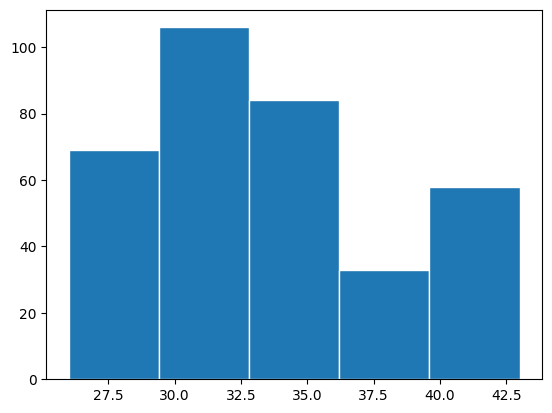

In [17]:
plt.hist(df["age"],bins=5,edgecolor="white") 

In [18]:
# numeric vs numeric | scatter
# distribution | histogram
# trend | line
# category vs number | bar or pie
# comparison | box plot

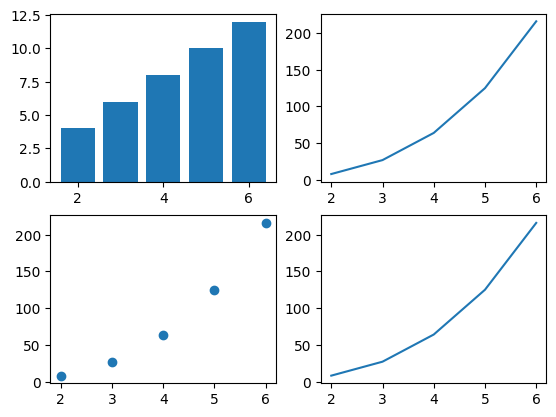

In [28]:
import numpy as np
figure,axes=plt.subplots(2,2) # subplot, used to plot multiple graphs. Row and column
x=np.array([2,3,4,5,6])
axes[0,0].bar(x,x*2)
axes[0,1].plot(x,x**3)
axes[1,0].scatter(x,x**3)
axes[1,1].plot(x,x**3)


{'whiskers': [<matplotlib.lines.Line2D at 0x1fc54cfb380>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc54cfb620>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc54cfb230>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc54cfb8c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc54cfba10>],
 'means': []}

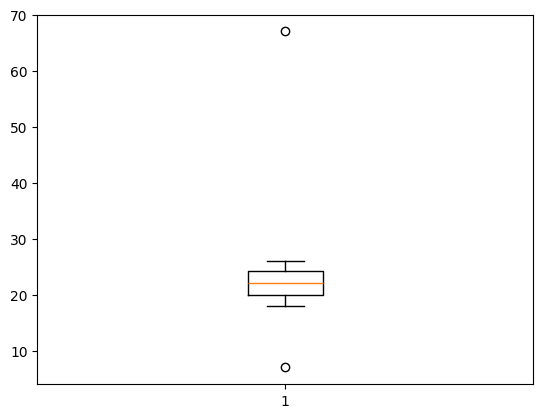

In [29]:
age=[18,20,21,22,23,25,26,7,20,21,22,24,20,67,24,25]
plt.boxplot(age)